# Bitcoin Price prediction of next 10 days using 2 Layers and 2 Dense

[*********************100%%**********************]  1 of 1 completed


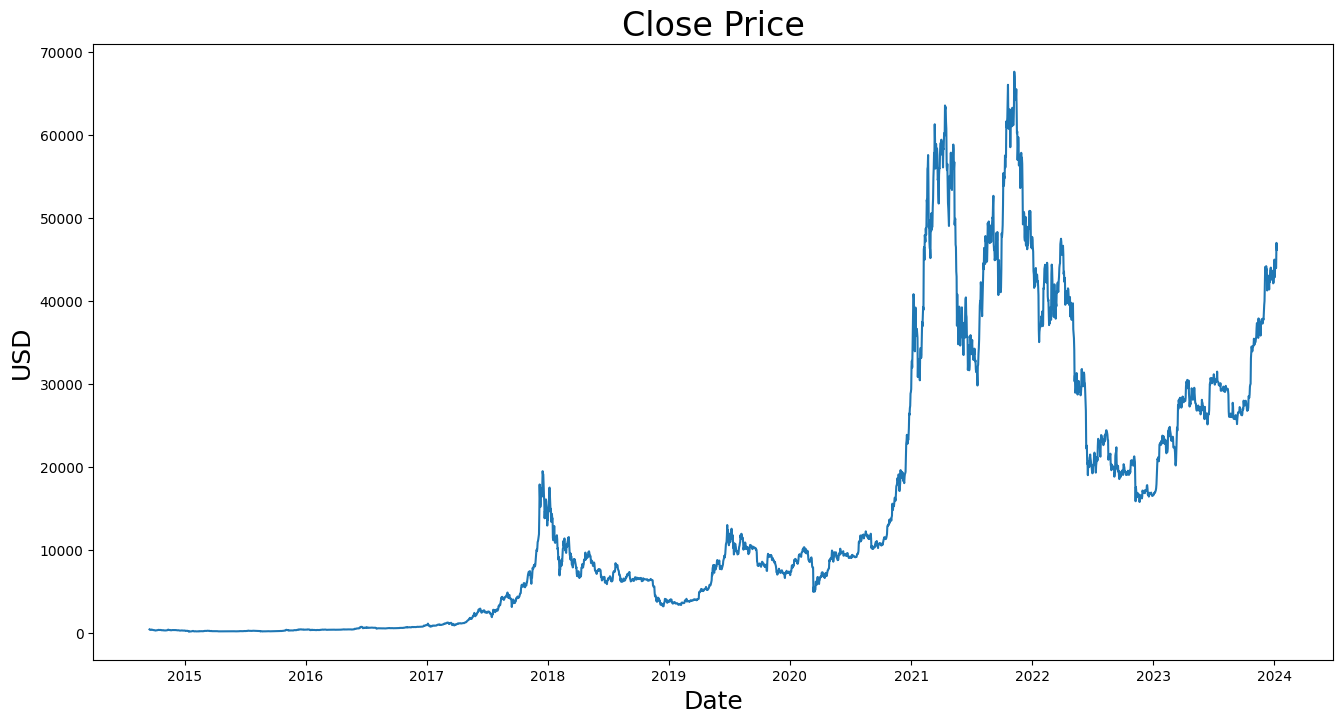

Epoch 1/10
2662/2662 [==============================] - 93s 33ms/step - loss: 0.0018
Epoch 2/10
2662/2662 [==============================] - 89s 34ms/step - loss: 7.2878e-04
Epoch 3/10
2662/2662 [==============================] - 84s 32ms/step - loss: 5.0233e-04
Epoch 4/10
2662/2662 [==============================] - 84s 32ms/step - loss: 4.5230e-04
Epoch 5/10
2662/2662 [==============================] - 86s 32ms/step - loss: 3.5982e-04
Epoch 6/10
2662/2662 [==============================] - 82s 31ms/step - loss: 3.2646e-04
Epoch 7/10
2662/2662 [==============================] - 77s 29ms/step - loss: 3.4102e-04
Epoch 8/10
2662/2662 [==============================] - 76s 29ms/step - loss: 3.6549e-04
Epoch 9/10
2662/2662 [==============================] - 74s 28ms/step - loss: 3.0129e-04
Epoch 10/10
1/1 [==============================] - 0s 42ms/step
2023-12-28 00:00:00: 43952.15234375
2023-12-29 00:00:00: 42381.97265625
2024-01-01 00:00:00: 41029.5078125
2024-01-02 00:00:00: 39719.36718

In [5]:
import math
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

def predict_future_crypto_price(symbol, start_date, end_date, future_days):
    # Fetch cryptocurrency price data
    df = yf.download(symbol, start=start_date, end=end_date)

    # Visualize the closing prices
    plt.figure(figsize=(16, 8))
    plt.title('Close Price', fontsize=24)
    plt.plot(df['Close'])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('USD', fontsize=18)
    plt.show()

    # Extract and scale the closing prices
    data = df.filter(['Close']).values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Split data into training and testing sets
    training_data_len = math.ceil(len(data) * 0.8)
    train_data = scaled_data[0:training_data_len, :]

    # Create sequences of 60 consecutive closing prices for training
    X_train, y_train = [], []
    for i in range(60, len(train_data)):
        X_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Build and train the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_train, y_train, batch_size=1, epochs=10)

    # Use the trained model to predict future prices
    future_prices = []
    last_60_days = scaled_data[-60:, :]
    for _ in range(future_days):
        X_future = np.array([last_60_days])
        X_future = np.reshape(X_future, (X_future.shape[0], X_future.shape[1], 1))
        predicted_price = model.predict(X_future)
        last_60_days = np.append(last_60_days, predicted_price, axis=0)[1:]
        future_prices.append(predicted_price[0, 0])

    # Denormalize the predicted prices
    future_prices = scaler.inverse_transform(np.array([future_prices]).T).flatten()

    # Display the predicted future prices
    future_dates = pd.date_range(end=end_date, periods=future_days + 1, freq='B')[1:]
    for date, price in zip(future_dates, future_prices):
        print(f"{date}: {price}")

# Example usage for BTC-USD for the next 10 days
predict_future_crypto_price('BTC-USD', '2014-01-01', '2024-01-10', future_days=10)


In [8]:
yfinance.download("BTC-USD", "2023-12-28", "2024-01-10")['Close']

[*********************100%%**********************]  1 of 1 completed


Date
2023-12-28    42627.855469
2023-12-29    42099.402344
2023-12-30    42156.902344
2023-12-31    42265.187500
2024-01-01    44167.332031
2024-01-02    44957.968750
2024-01-03    42848.175781
2024-01-04    44179.921875
2024-01-05    44162.691406
2024-01-06    43989.195312
2024-01-07    43943.097656
2024-01-08    46970.503906
2024-01-09    46139.730469
Name: Close, dtype: float64

# Bitcoin price prediction of next 10 days using one Extra layer of 100 neurons 

[*********************100%%**********************]  1 of 1 completed


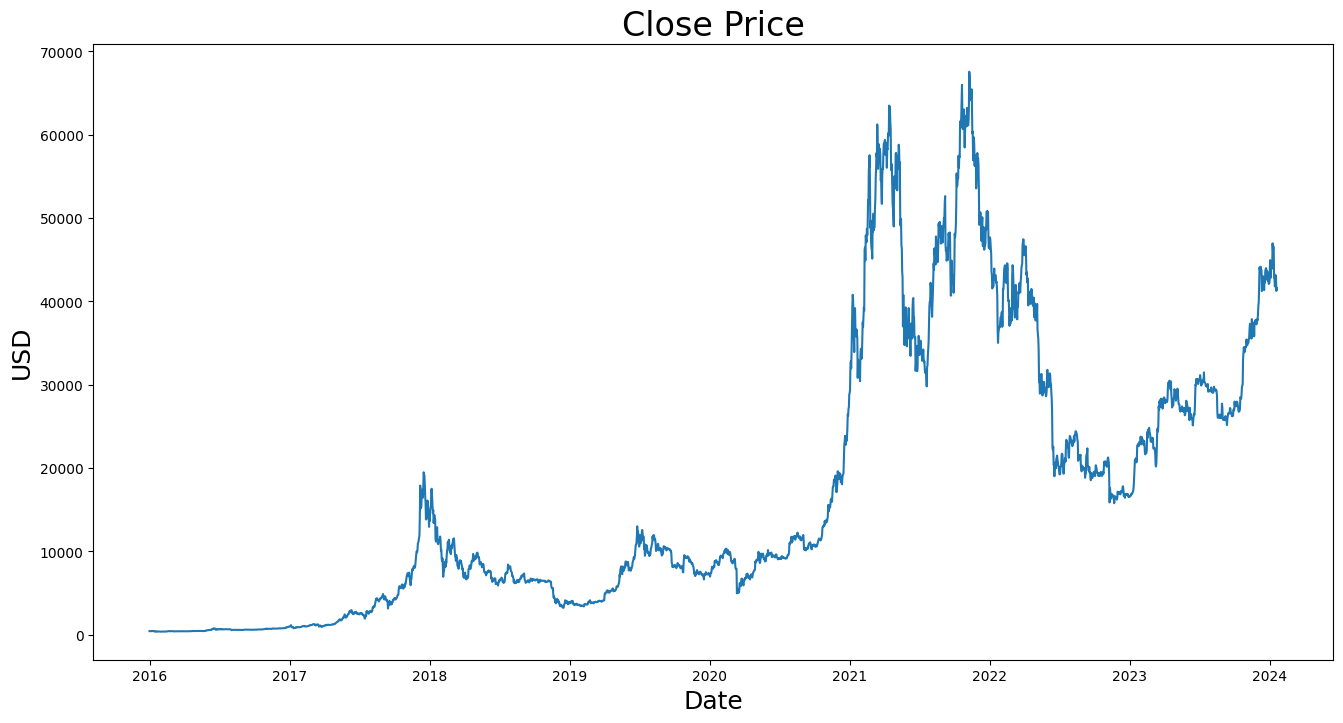

Epoch 1/10

2293/2293 [==============================] - 116s 47ms/step - loss: 0.0031
Epoch 2/10
2293/2293 [==============================] - 109s 48ms/step - loss: 0.0011
Epoch 3/10
2293/2293 [==============================] - 106s 46ms/step - loss: 7.5376e-04
Epoch 4/10
2293/2293 [==============================] - 107s 47ms/step - loss: 7.5771e-04
Epoch 5/10
2293/2293 [==============================] - 108s 47ms/step - loss: 4.8233e-04
Epoch 6/10
2293/2293 [==============================] - 107s 47ms/step - loss: 5.8663e-04
Epoch 7/10
19/19 [==============================] - 3s 41ms/step
Root Mean Squared Error (RMSE): 847.8089225924745


C:\Users\Shreenav Dhakal\AppData\Local\Temp\ipykernel_9660\416773427.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


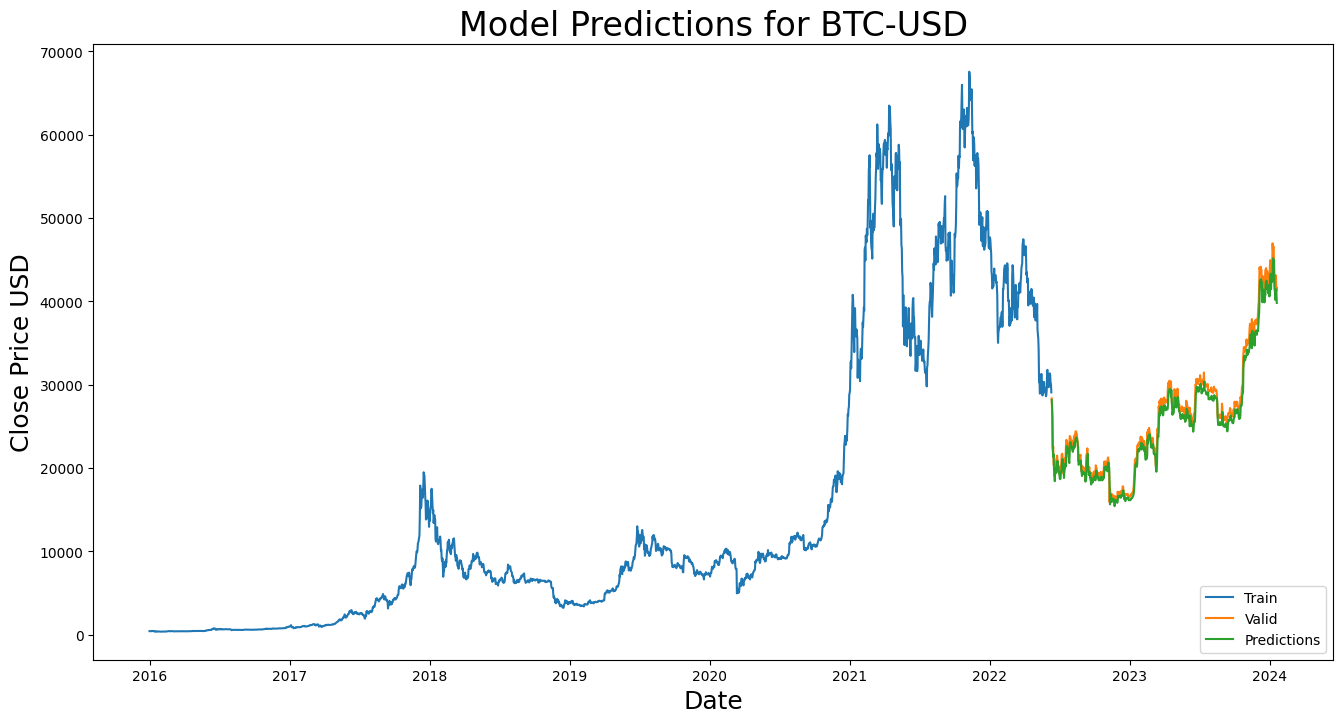

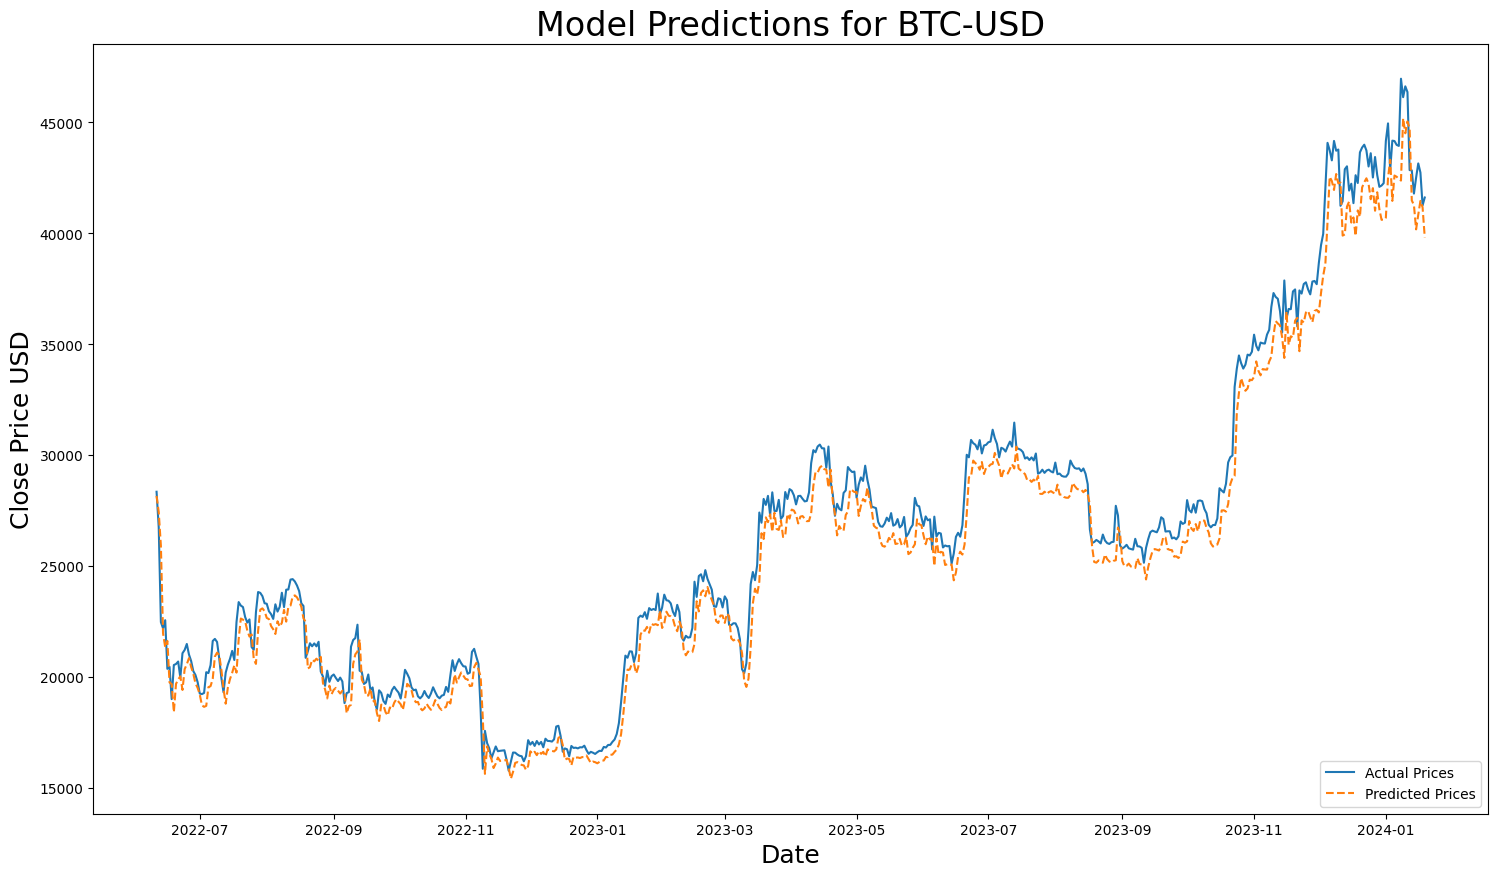

1/1 [==============================] - 0s 60ms/step
2024-01-08 00:00:00: 40070.203125
2024-01-09 00:00:00: 38627.64453125
2024-01-10 00:00:00: 37260.37109375
2024-01-11 00:00:00: 35889.484375
2024-01-12 00:00:00: 34546.57421875
2024-01-15 00:00:00: 33237.8515625
2024-01-16 00:00:00: 31969.31640625
2024-01-17 00:00:00: 30745.328125
2024-01-18 00:00:00: 29569.0703125
2024-01-19 00:00:00: 28442.55078125


In [2]:
import math
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

def predict_future_crypto_price(symbol, start_date, end_date, future_days):
    # Fetch cryptocurrency price data
    df = yf.download(symbol, start=start_date, end=end_date)

    # Visualize the closing prices
    plt.figure(figsize=(16, 8))
    plt.title('Close Price', fontsize=24)
    plt.plot(df['Close'])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('USD', fontsize=18)
    plt.show()

    # Extract and scale the closing prices
    data = df.filter(['Close']).values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Split data into training and testing sets
    training_data_len = math.ceil(len(data) * 0.8)
    train_data = scaled_data[0:training_data_len, :]

    # Create sequences of 60 consecutive closing prices for training
    X_train, y_train = [], []
    for i in range(60, len(train_data)):
        X_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Build and train the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(100))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    history = model.fit(X_train, y_train, batch_size=1, epochs=10, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)])

    # Create sequences for the test set
    test_data = scaled_data[training_data_len - 60:, :]
    X_test = []
    y_test = data[training_data_len:, :]
    for i in range(60, len(test_data)):
        X_test.append(test_data[i-60:i, 0])

    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Make predictions on the test set
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)

    # Evaluate the model
    rmse = np.sqrt(np.mean(predictions - y_test)**2)
    print(f'Root Mean Squared Error (RMSE): {rmse}')

    # Visualize the predictions
    train = df[:training_data_len]
    valid = df[training_data_len:]
    valid['Predictions'] = predictions

    plt.figure(figsize=(16, 8))
    plt.title(f'Model Predictions for {symbol}', fontsize=24)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
    plt.show()
    
    # Plot for valid and predictions
    plt.figure(figsize=(18, 10))  # Increased figure size
    plt.title(f'Model Predictions for {symbol}', fontsize=24)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD', fontsize=18)
    plt.plot(valid['Close'], label='Actual Prices')
    plt.plot(valid['Predictions'], label='Predicted Prices', linestyle='dashed')
    plt.legend(loc='lower right')
    plt.show()

    # Use the trained model to predict future prices
    future_prices = []
    last_60_days = scaled_data[-60:, :]
    for _ in range(future_days):
        X_future = np.array([last_60_days])
        X_future = np.reshape(X_future, (X_future.shape[0], X_future.shape[1], 1))
        predicted_price = model.predict(X_future)
        last_60_days = np.append(last_60_days, predicted_price, axis=0)[1:]
        future_prices.append(predicted_price[0, 0])

    # Denormalize the predicted prices
    future_prices = scaler.inverse_transform(np.array([future_prices]).T).flatten()

    # Display the predicted future prices
    future_dates = pd.date_range(end=end_date, periods=future_days + 1, freq='B')[1:]
    for date, price in zip(future_dates, future_prices):
        print(f"{date}: {price}")

# Example usage for BTC-USD for the next 10 days
predict_future_crypto_price('BTC-USD', '2016-01-01', '2024-01-20', future_days=10)
